# Diagramma di Hubble e modello cosmologico standard

Progetto svolto durante l'anno accademico 2020/2021 dagli studenti dell'Università di Napoli Federico II:
- Daniele Antonucci;
- Federica De Luca ;
- Gaia Edes Esposito.

## Introduzione

In questo progetto viene analizzato il modello cosmologico standard "$\Lambda$-cold-dark-matter" nell'ipotesi di universo piatto $\Omega_{k}=0$. La funzione di Hubble è:

$$ H(z) = H_{0}\sqrt{\Omega_{\Lambda} + \Omega_{m} (z + 1 )^{3} + \Omega_{k} (z + 1 )^{2} }$$
$$\Omega_{\Lambda} + \Omega_{m} + \Omega_{k} =1$$

Con  $H_{0}$, $\Omega_{\Lambda}$ ed $\Omega_{m}$ parametri che rappresentano rispettivamente la costante di Hubble, la densità di energia e materia oscura e la densità di materia conosciuta (rispetto alla densità critica $ρc = \frac{3H_{0}^{2}}{8πG_{N}}$), quest'ultimi due sono parametri adimensionali. Secondo la legge di Hubble, per piccole distanze esiste una relazione lineare tra il redshift e distanza di luminosità $D_{L}$. $H_{0}$  rappresenta, in tale regime, come scala la velocità di espansione dell'universo al variare della distanza degli oggetti astronomici osservati.

Il modello $\Lambda$-C-D-M permette di descrivere attualmente l'Universo e i processi evolutivi che l'hanno determinato. Esso è stato modificato con l'introduzione del parametro $\Omega_{\Lambda}$ come elemento fondamentale che provoca l'accelerazione e ad essa è associata l'energia oscura quando, studiando le supernovae $Ia$ ad alto redishift si osservò che l'universo è in espansione ad una velocità crescente.

La luminosità degli oggetti astronomici, legata alla loro distanza, si misura in magnitudini apparenti o assolute:
la magnitudine apparente $m$ è la misura del flusso di un oggetto celeste confrontato con quello di un oggetto di riferimento.

$$ m - m_{0} = -2.5 \log_{10}{\frac{f}{f_{0}}} $$

la magnitudine assoluta  $M$invece, viene misurata ponendo che gli oggetti si trovino ad una distanza fissa di 10 pc, per cui è indipendente dalla distanza:

$$ M - M_{0} = -2.5 \log_{10}{\frac{L}{4\pi 10^{2}}} $$.

Il modulo di distanza $\mu (z)$ è definito dalla differenza tra la magnitudine assoluta $M$ e apparente $m$. Usando il modello è possibile esprimere la distanza di un oggetto in termini di modulo di distanza:
$$ \mu (z) = 25 + 5\log_{10}{ D_{L}(z)} $$

- dove $z$ è il redshift, ovvero lo spostamento della lunghezza d'onda, della luce emessa dall'oggetto astronomico osservato, verso il rosso. Esso è causato dell'espansione dell'universo;

- $D_{L}(z)$ rappresenta la distanza di luminosità ed espressa in Mpc. Questa viene definita operativamente attraverso la misura del flusso di energia $ f = \frac{L}{4\pi D_{L}^{2}} $  , ovvero la luminosità divisa per il raggio della superficie sferica su cui si distribuisce la luce emessa dalla supernova.
A causa dell'effetto redshift si ha che il flusso dipende da $z$ , $ f = \frac{L}{4\pi Dc^{2}(1+z)^{2}} $. 
Di conseguenza si ottiene che $D_{L} = D_{c}(1 + z)$ dove $D_{c}$ è detta distanza comovente. Nel caso di un universo piatto la distanza comovente è pari a: 

$$ Dc (z) = \frac{c}{H_{0}} \int_{0}^{z}{E(\eta) d\eta} $$
     dove $ E(z) = \frac{H(z)}{H_{0}} $ è il parametro di Hubble adimensionale.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc  
from scipy.optimize import curve_fit
from scipy.stats import chi2

Di seguito sono riportati la tabella e il grafico dei dati sperimentali:

In [2]:
df = pd.read_csv('dati.csv')
df = df[['redshift', 'mod_dist', 'mod_dist_err']].sort_values('redshift', ascending = True)
df

,redshift,mod_dist,mod_dist_err
50,0.015000,34.163504,0.161453
148,0.015000,34.111411,0.213389
132,0.015000,34.379773,0.217349
159,0.015027,33.950191,0.178117
139,0.015100,34.525875,0.213682
...,...,...,...
557,1.340000,45.067506,0.275015
570,1.350000,44.827065,0.185705
533,1.370000,45.049713,0.262748
537,1.390000,44.876234,0.250632


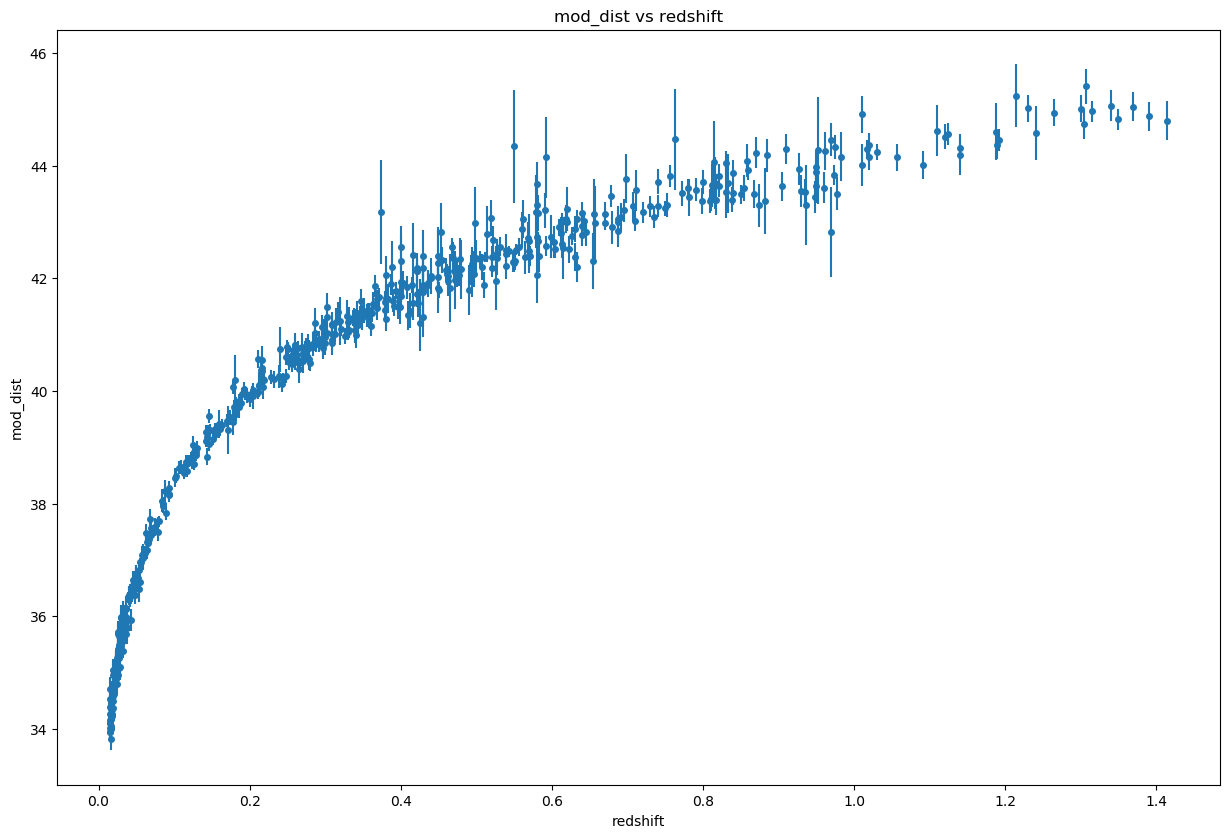

In [3]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
plt.title('mod_dist vs redshift')
ax.errorbar(df.redshift, df.mod_dist, xerr = 0, yerr=df.mod_dist_err, marker='o', markersize=4, linestyle='')
ax.set_xlabel('redshift')
ax.set_ylabel('mod_dist')
plt.show()

Riportiamo il grafico della distanza di luminosità in funzione del redshift:

In [4]:
df['dist']=10**(0.2*df['mod_dist']+1)*10**-6 

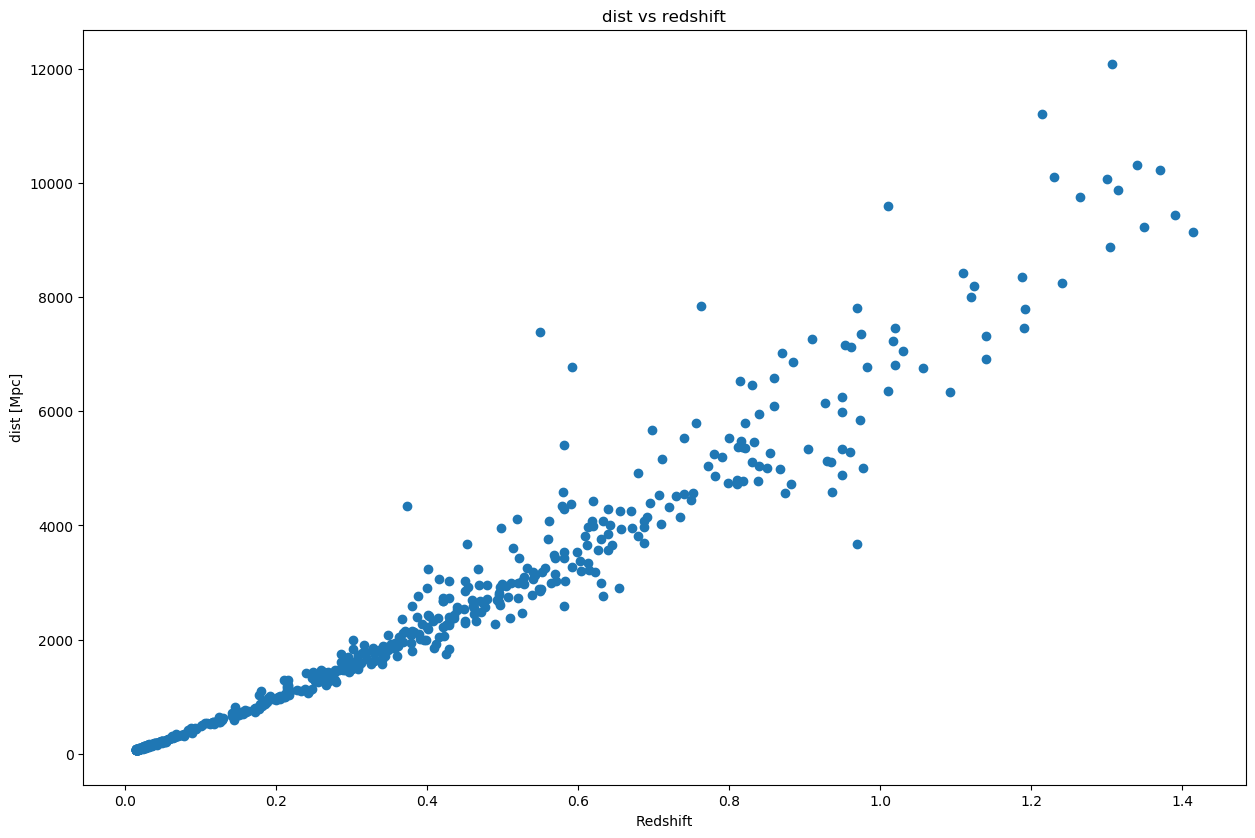

In [49]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
plt.plot(df['redshift'],df['dist'],'o')
plt.title('dist vs redshift')
plt.xlabel('Redshift')
plt.ylabel('dist [Mpc]')
plt.show()

Come ci si aspettava dalla legge di Hubble, il grafico presenta un regime lineare per piccoli valori di redshift, e poi tende ad incurvarsi mostrando la necessità di dover introdurre un nuovo parametro nel modello che permetta di seguire bene i dati sperimentali. Questo parametro è legato alla presenza nell'universo di materia ancora sconosciuta. 

## Analisi dei dati

Per ovviare alla risoluzione numerica dell'integrale , al fine di ottenere la forma analitica della distanza di luminosità, si può dimostrare che quest'ultima è soluzione di una particolare equazione differenziale del secondo ordine. Vale la seguente relazione:

$D_{L}(z) = \frac{c}{H_{0}} \frac{2(1+z)}{\sqrt{\Omega_{m}}} {2F_{1}[\frac{1}{6};\frac{1}{2};\frac{7}{6};\frac{\Omega_{m}-1}{\Omega_{m}}] } - \frac{1}{\sqrt{1+z}}{2F_{1}[\frac{1}{6};\frac{1}{2};\frac{7}{6};\frac{\Omega_{m}-1}{\Omega_{m}}(1+z)^{-3}] }$

dove ${2}F_{1}$ è una funzione ipergeometrica di seconda specie, attraverso il modulo [```scipy.special```] verranno definite tali funzioni inserendo gli opportuni parametri come argomento. 
Un secondo metodo, per calcolare il modulo di distanza ed effettuare direttamente il fit senza calcolare direttamente l'integrale è [```astro.py```] , che verrà effettuato in seguito.

Per semplificare la notazione i parametri sono stati rinominati:
- A è la costante di Hubble
- B è il parametro  $\Omega_{m}$
- C è il parametro $\Omega_{\Lambda}$
- z è il redshift.

In [6]:
#funzioni ipergeomtriche.
def geom_1(B):
    return sc.hyp2f1(1/6,1/2,7/6, (B - 1)/B)
def geom_2(B,z):
    return sc.hyp2f1(1/6,1/2,7/6, ((B - 1)/B) * (1 + z) ** (-3))

In [7]:
# velocità della luce in km/s:
c = 299792.458

In [8]:
#Luminosità Dl(z):
def Dl(z,A,B):
     return ((c/A) * (2 * (1 + z))/np.sqrt(B)) * (geom_1(B) - 1/np.sqrt(1 + z) * geom_2(B,z))

## Curve fit con sciPy

Per stimare i parametri è stato effettuato un fit ai minimi quadrati.
Si è adoperata la funzione di ```SciPy``` [```curve_fit```]

In [9]:
def model(z, A, B):
    return 25 + 5 * np.log10(Dl(z,A,B))

In [10]:
xdata = pd.Series(df.redshift).values
ydata = pd.Series(df.mod_dist).values
sigmas = pd.Series(df.mod_dist_err).values

In [11]:
model2 = np.vectorize(model)

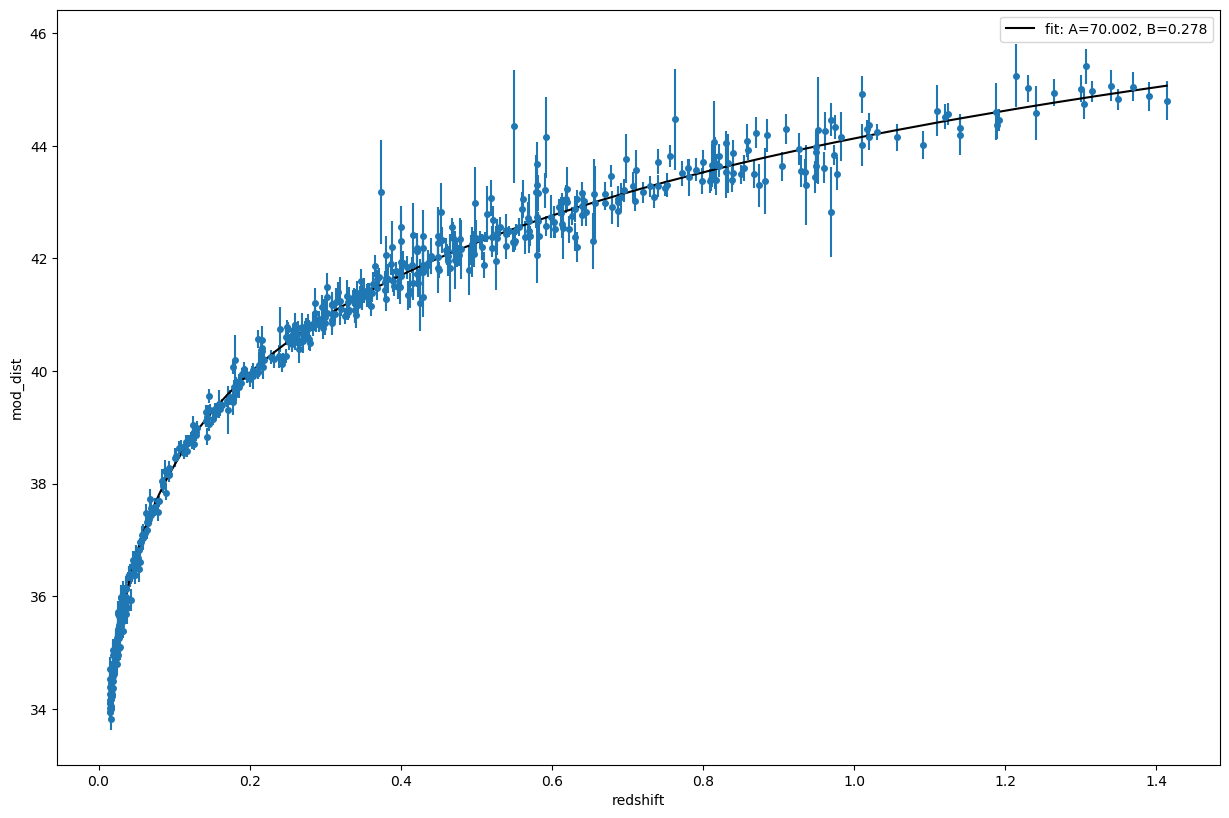

In [12]:
popt, pcov = curve_fit(model2, xdata, ydata, p0=[10,0.5], sigma=sigmas, absolute_sigma=True)

fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
ax.errorbar(df.redshift, df.mod_dist, xerr = 0, yerr=df.mod_dist_err, marker='o', markersize=4, linestyle='')
ax.set_xlabel('redshift')
ax.set_ylabel('mod_dist')
plt.plot(xdata, model2(xdata, *popt), 'r-', label='fit: A={:5.3f}, B={:5.3f}'.format(*popt),color = 'black')
plt.legend()
plt.show()

Seguono i parametri ricavati dal fit:

In [13]:
print('curve fit')
print()
print(popt)
print()
print(pcov)         
print()
print("A = {:.3f}+/-{:.3f} Mpc^-1".format(popt[0],np.sqrt(pcov[0,0])))
print("B = {:.3f}+/-{:.3f}".format(popt[1],np.sqrt(pcov[1,1])))
print("Ricordando che B+C=1")
C = 1 - 0.278
print("C = ",C , "± 0.019")

curve fit

[70.00241378  0.27761209]

[[ 0.11675813 -0.00490025]
 [-0.00490025  0.00037945]]

A = 70.002+/-0.342 Mpc^-1
B = 0.278+/-0.019
Ricordando che B+C=1
C =  0.722 ± 0.019


 Al fine di osservare in modo quanto i punti sperimentali si discostano dal fit, segue il grafico dei residui calcolati attraverso la seguente formula $$\sum_{i=1}^N \frac{(y_{i}^{teo}-y_{i}^{exp})}{\sigma_{y_{i}}} = \sum_{i=1}^N \frac{(model(z,A,B) - y_{i}^{exp})}{\sigma_{y_{i}}} $$

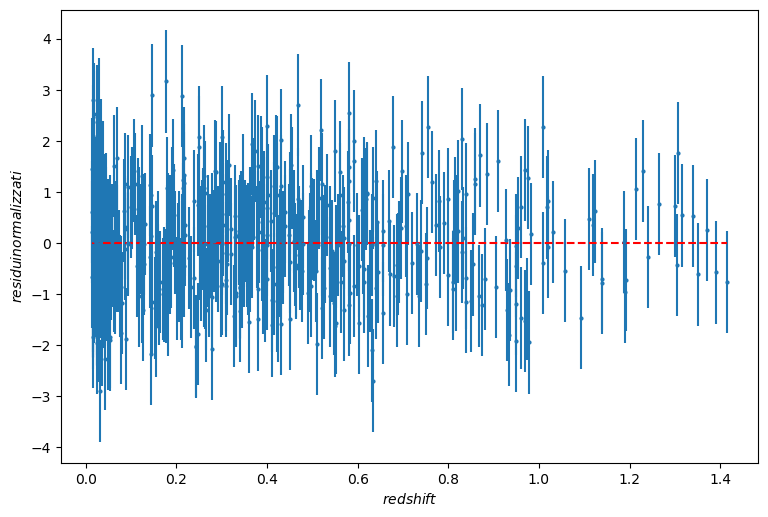

In [14]:
plt.figure(figsize=(9,6), dpi=100)
ax1=plt.subplot()
ax1.errorbar(df.redshift, ((df.mod_dist - model2(df.redshift, 70.002, 0.278))/df.mod_dist_err), xerr = 0, yerr= 1, fmt="o", markersize=2)
ax1.plot(df.redshift, np.zeros(580), color = 'r', linestyle = '--' )
ax1.set_xlabel(r'$redshift$ ')
ax1.set_ylabel('$residui normalizzati$')
plt.show()

E' possibile calcolare per ogni coppia di punti (```redshift,mod_dist```) lo scarto quadratico tra il valore sperimentale e quello teorico:

$$ D^{2} =\sum_{i=1}^N (y_{i}^{teo}-y_{i}^{exp})^{2} = \sum_{i=1}^N(model(z,A,B) - y_{i}^{exp})^{2} $$

il fit è stato trovato minimizzando i parametri A e B fino a che $\chi ^{2}$ raggiungesse il minimo assoluto.
Trovati i parametri di best fit è possibile risalire alla stima dell'errore $\sigma_{y,fit}$.

$$\sigma_{y,fit}^{2}=\frac{\sum_{i=1}^N(model(z,A,B) - y_{i}^{exp})^{2}}{N-2} = \frac{D^{2}}{N-2}$$

$N - 2$ è il grado di libertà che caratterizza il fit, esso è dato dalla differenza del numero di dati sperimentali e il numero di parametri da stimare. 

Il fit è corretto se risulta che $ \sigma_{y,fit}^{2}$ è confrontabile con $\sigma_{y_{i}}^{2}$, segue quindi il calcolo del $\chi ^{2}$ normalizzato:



$\chi^{2} = \sum_{i=1}^N (\frac{y_{i}^{teo}-y_{i}^{exp}}{\sigma_{y_{i}}})^{2} = (N-2) \sum_{i=1}^N \frac{\sigma_{y_{i},fit}} {\sigma_{y_{i}}}$



$\chi^{2}_{norm} = \frac{\chi^{2}}{N-2} $

In [51]:
chi = 0
for i in range(580):
    chi += ((df.mod_dist[i] - model2(df.redshift[i], 70.002, 0.278))/df.mod_dist_err[i])**2
       
chi_norm = chi / (580 - 2)
print("chi_2_norm =", chi_norm)

chi_2_norm = 0.9727117935136267


Osserviamo che il $\chi^{2}_{norm}$ è circa 1. Quindi si può dire che $\sigma_{fit}^{2} \approx \sigma_{y}^{2}$ e che il fit eseguito è corretto. Attraverso il test $\chi^{2}$ è possibile verificare se le misure $y_{i}$ seguono un andamento gaussiano, se si può accettare tale ipotesi significa che è stato lecito effettuare il fit con la minimizzazione del $\chi^{2}$  :

Data la P.D.F. del $\chi^{2}$  per il corrispettivo numero di gradi n di libertà del sistema  e la sua cumulativa $F(\chi^2_{\mathrm{obs}};n)$, E' stato calcolato il p-value $p = 1- F(\chi^2_{\mathrm{obs}};N-2)$, per verificare la validità dell'ipotesi per cui gli errori seguono un andamento gaussiano.

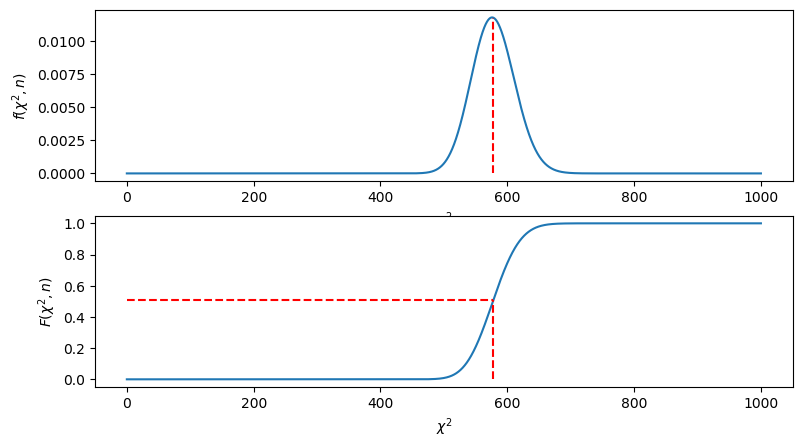

In [53]:
plt.figure(figsize=(9,5),dpi=100)
step = 0.01
xmin,xmax = 0,1000
x = np.arange(xmin, xmax+step, step)
z = chi2.cdf(x, 578)
y = chi2.pdf(x, 578)
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.xlabel('$\chi^2$')
plt.ylabel('$f(\chi^2,n)$')
plt.plot([578,578], [0,chi2.pdf(578, 578)],linestyle='--',color = 'r')
plt.subplot(2, 1, 2)
plt.plot(x, z)
plt.xlabel('$\chi^2$')
plt.ylabel('$F(\chi^2,n)$')
plt.plot([578,578], [0,chi2.cdf(578, 578)],linestyle='--',color = 'r')
plt.plot([0,578], [chi2.cdf(578, 578),chi2.cdf(578, 578)],linestyle='--',color = 'r')
plt.show()

In [17]:
F = chi2.cdf(chi, 578)

In [18]:
p_value = 1 - F
print('p_value =', p_value)

p_value = 0.6731157895437971


segue che ad un livello di significatività del 5% l' ipotesi secondo la quale il campione di dati segue la distribuzione normale è corretta.

## Curve fit con Astro.py

Segue il fit effettuato attraverso il modulo [```Astro.Py```], che permette di calcolare il modulo di distanza senza risolvere direttamente l'integrale $\int_{0}^{z}{E(\eta) d\eta} $

In [19]:
from astropy.cosmology import WMAP9
from astropy.cosmology import FlatLambdaCDM

In [20]:
def Dl(z,A,B):
    cosmo=FlatLambdaCDM(H0=A, Om0=B)
    return cosmo.luminosity_distance(z).to_value()

In [21]:
def modello(z, A, B):
    return (25 + 5 * np.log10(Dl(z,A,B)))

In [22]:
x_data,y_data,sigmas = (df['redshift'],df['mod_dist'],df['mod_dist_err'])

In [23]:
x_data=x_data.to_numpy()
y_data=y_data.to_numpy()

In [24]:
x_data=list(x_data)
y_data=list(y_data)

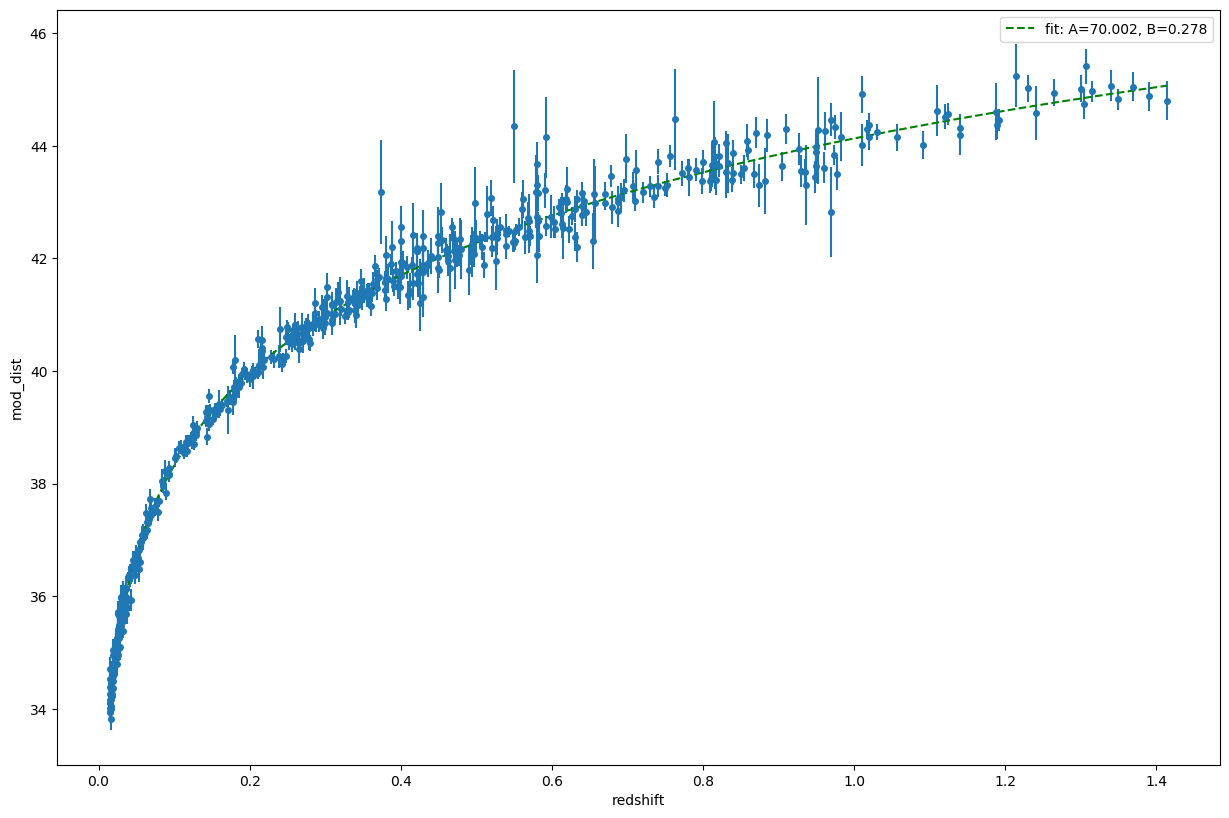

In [25]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
popt, pcov = curve_fit(modello, x_data, y_data, p0=[69,0.3], sigma=sigmas, absolute_sigma=True)
ax.errorbar(df.redshift, df.mod_dist, xerr = 0, yerr=df.mod_dist_err, marker='o', markersize=4, linestyle='')
ax.set_xlabel('redshift')
ax.set_ylabel('mod_dist')
plt.plot(x_data, modello(x_data, *popt), 'g--',
         label='fit: A=%5.3f, B=%5.3f' % tuple(popt))
plt.xlabel('redshift')
plt.ylabel('mod_dist')
plt.legend()
plt.show()

Non viene riportata l'analisi relativa al chi-quadro perché il fit è identico al caso in cui è stato usato [```SciPy```] per fittare il modello contenente le funzioni ipergeometriche. 

## Curve fit con Minuit

Un metodo alternativo a [```curve_fit```], più utilizzato in fisica in quanto insuperato per una serie di problemi di minimizzazione, è [```Minuit```]. È stato effetuato un fit anche con questo pacchetto, ma utilizzando le stesse funzioni ipergeometriche definite in precedenza.

In [26]:
from iminuit.cost import LeastSquares
from iminuit import Minuit

In [27]:
def model(z, A, B):
    return 25 + 5 * np.log10(Dl(z,A,B))

In [28]:
least_squares = LeastSquares(df.redshift, df.mod_dist, df.mod_dist_err, model)

In [29]:
m = Minuit(least_squares, A = 70, B = 0.2)

I parametri risultano essere in questo caso:

In [30]:
m.minos()

┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   70.00   │   0.31    │   -0.31    │    0.31    │         │         │       │
│ 1 │ B    │   0.200   │   0.015   │   -0.015   │   0.015    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           A           │           B           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.31   │   0.31    │  -0.015   │   0.015   │
│  Valid   │   False   │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   True    │   True    │   True    │   True    │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        A        B │
├───┼───────────────────┤
│ A │   0.0963 -0.00315 │
│ B │ -0.00315 0.000227 │
└───┴───────────────────┘

Con minuit è anche possibile ricavare la matrice delle covarianze e il $\chi^{2}$

In [31]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 562.2                      │              Nfcn = 94               │
│ EDM = 1.76e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   70.00   │   0.34    │   -0.31    │    0.31    │         │         │       │
│ 1 │ B    │   0.278   │   0.019   │   -0.015   │   0.015    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           A           │           B           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.31   │   0.31    │  -0.015   │   0.015   │
│  Valid   │   False   │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   True    │   True    │   True    │   True    │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        A        B │
├───┼───────────────────┤
│ A │    0.115 -0.00478 │
│ B │ -0.00478 0.000373 │
└───┴───────────────────┘

Come si può vedere da quest'ultima tabella il $\chi^{2}$ vale:

In [32]:
chi_2 = m.fval
print("chi_2 =", chi_2)

chi_2 = 562.2266263461689


Di conseguenza è stato ricavato il $\chi^{2}$ normalizzato

In [33]:
chi_2_norm = m.fval / (len(xdata) - m.nfit)
print("chi_2_norm=", chi_2_norm)

chi_2_norm= 0.9727104262044445


Essendo A e B identici al ai parametri ricavati attraverso la funzione [```curve fit```], si ha che il p-value e il $\chi^{2}$ sono uguali al caso precedente.

Segue il grafico contenente il fit effettuato con [```Minuit```]:

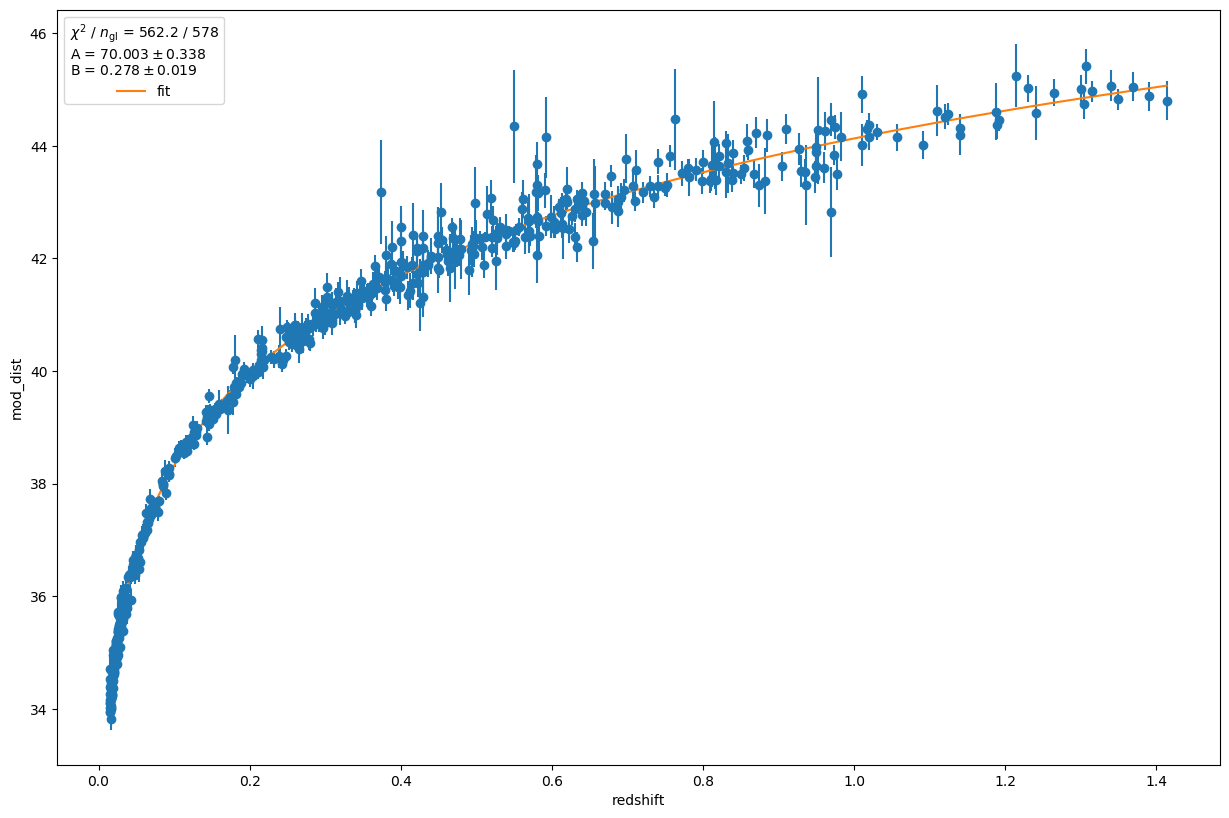

In [34]:
plt.figure(figsize=(15,10), dpi=100)
plt.errorbar(xdata, ydata,sigmas, fmt="o")
data_y_f = model(xdata, 70.01,0.277)
plt.plot(xdata, data_y_f, label="fit")
plt.xlabel('redshift')
plt.ylabel('mod_dist')
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{gl}}$ = {m.fval:.1f} / {len(xdata) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.show()

Segue il grafico dei residui:

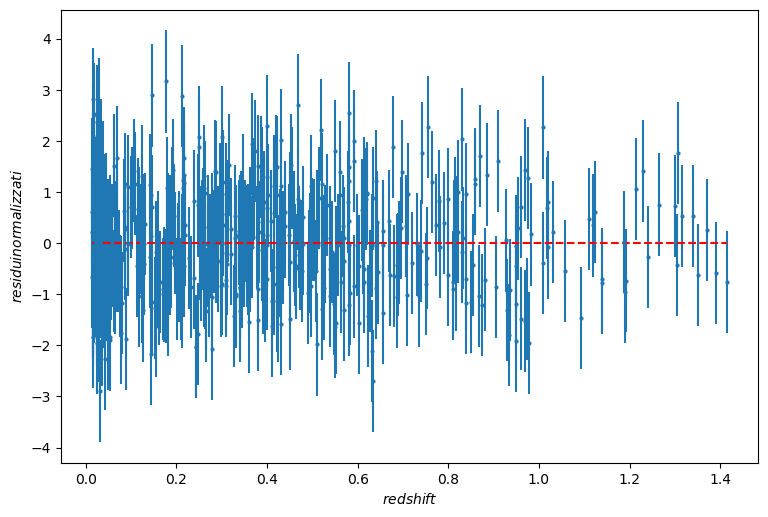

In [35]:
plt.figure(figsize=(9,6), dpi=100)
ax1=plt.subplot()
ax1.errorbar(df.redshift, ((df.mod_dist - model2(df.redshift, 70.01, 0.277))/df.mod_dist_err), xerr = 0, yerr=1, fmt="o", markersize=2)
ax1.plot(df.redshift, np.zeros(580), color = 'r', linestyle = '--' )
ax1.set_xlabel(r'$redshift$ ')
ax1.set_ylabel('$residui normalizzati$')
plt.show()

## Intervalli di confidenza di $H_{0}$ e $\Omega_{m}$

Sono stati, infine, analizzati i contorni di confidenza per i due parametri stimati $H_{0}$ e $\Omega_{m}$, con i contenuti probabilistici al 68%, 90% e 99% .

Infatti, poiché le grandezze fisiche misurate sono affette da incertezze casuali che  danno luogo ad una distribuzione Normale, sappiamo che la probabilità di trovare una data misura ad una distanza crescente, in termini di sigma, decresce.  In questo modo, si può osservare graficamente quali coppie di parametri non verificano il modello. Si può dire che il valore centrale di queste curve è il valore di best fit.

Definita la matrice di correlazione, gli elementi sull'antidiagonale sono i coefficienti di correlazione tra i parametri.

In [50]:
m.covariance.correlation()

,A,B
A,1,-0.732
B,-0.732,1


Poichè questi ultimi sono in modulo compresi tra ```[0.7,1]``` si può affermare che esiste una forte correlazione tra $H_{0}$ e $\Omega_{m}$.

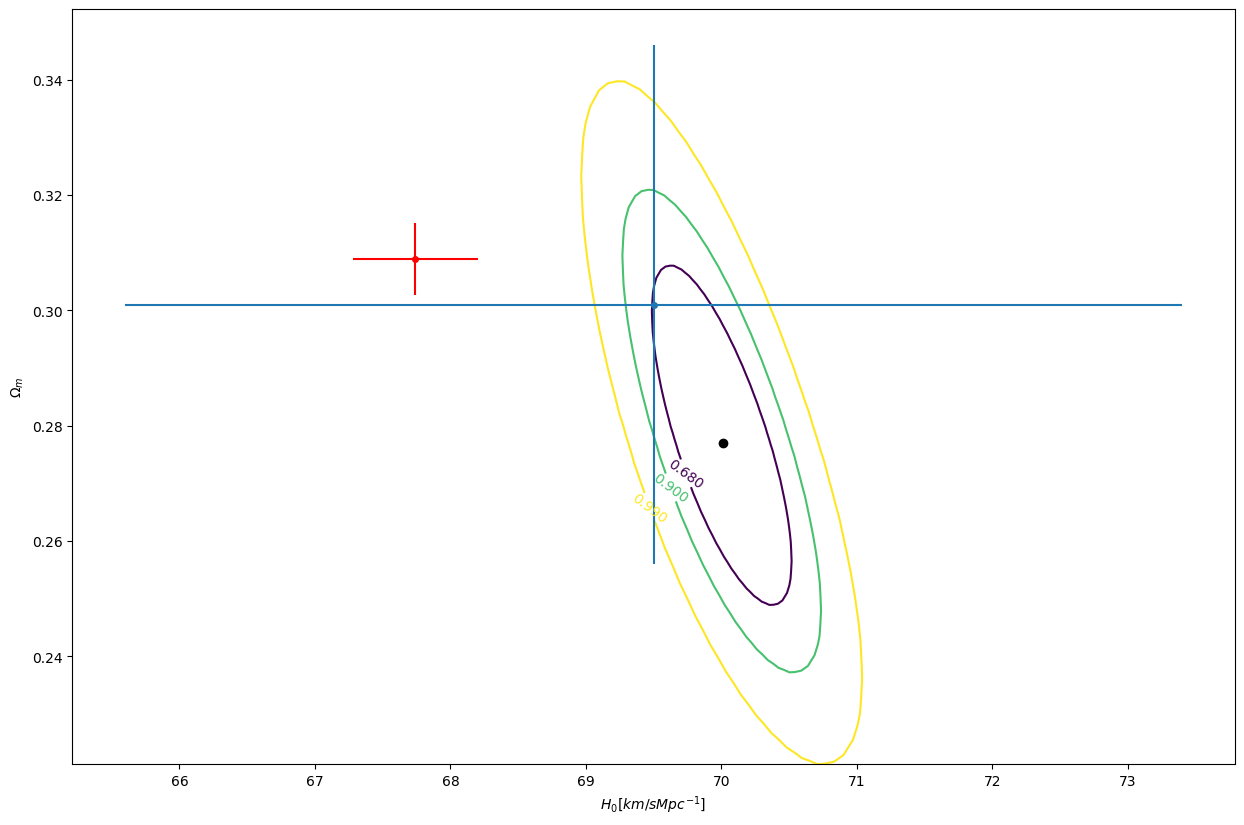

In [48]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
m.draw_mncontour("A", "B", cl=(0.68, 0.9, 0.99))
plt.scatter(70.01, 0.277, color = 'black')
ax.errorbar(69.5, 0.301, xerr = 3.9, yerr=0.045, marker='o', markersize=4, linestyle='')
ax.errorbar(67.74, 0.3089, xerr = 0.46, yerr=0.0062, marker='o', markersize=4, linestyle='', color = 'r')
plt.xlabel("$H_{0} [km/s Mpc^{-1}]$ ")
plt.ylabel("$\Omega_{m}$")
plt.show()

Osserviamo che gli intervalli di confidenza sono ellittici e perfettamente simmetrici attorno al valore centrale. Attraverso l'analisi effettuata con Minuit è emerso che gli intervalli di errore sono perfettamente simmetrici a testimonianza di un andamento gaussiano delle misure. Ciò non ci sorprende in quanto dal teorema del limite centrale è noto che qualsiasi distribuzione che sia data dalla sovrapposizione di molti effetti è approssimabile ad una distribuzione gaussiana. Nel caso in esame, visto l'elevato numero di misure l'andamento risultante è perfettamente gaussiano. 
Il punto in blu, con relative incertezze, rappresenta la stima dei parametri ottenuta da uno studio completo del fenomeno, che tiene conto anche del redshift dei quasar. Questa stima risulta compatibile con l'analisi ristretta allo studio delle supernovae. 

Inoltre, è stato riportato nel grafico la stima dei due parametri (in rosso) ottenuta da recenti esperimenti in cui il fit include l'anisotropia della radiazione cosmica di fondo. Come si evince dal grafico, a causa dell'elevata precisione con cui sono condotti gli esperimenti recenti, le due stime dei parametri non sono tra di loro compatibili entro gli errori. Ciò ha dato vita ad un dibattito scientifico poichè non si riescono ad identificare le cause di questa inconsistenza.

## Conclusioni

I parametri ottenuti da entrambi i fit risultano compatibili tra loro. Si osserva che il fit del modello nel quale è stato introdotto il parametro $\Omega_{\Lambda}$, per giustificare l'espansione accelerata dell'universo, segue correttamente i dati sperimentali. Pertanto dallo studio della relazione che intercorre tra il redshift e il modulo di distanza è emerso che l'universo è composto per il $\approx 70\%$ di materia ed energia non conosciuta.